In [1]:
pip install --upgrade patsy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 15.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

#pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [5]:
import pandas as pd

 
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['churn-bigml-20.csv', 'churn-bigml-80.csv']), ignore_index=True)

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# T Test 

In [8]:
#Using Coln 17 for Single test
len(df)

3333

In [9]:
print(df['Total intl charge'])

0       2.35
1       3.43
2       1.46
3       2.08
4       3.00
        ... 
3328    3.19
3329    2.67
3330    2.59
3331    3.81
3332    3.70
Name: Total intl charge, Length: 3333, dtype: float64


In [10]:
#Calculating Mean of Total Intl Charge
# Total intl charge = intlCHG

import numpy as np
intlCHG_mean=np.mean(df['Total intl charge'])
print(intlCHG_mean)

2.7645814581458144


In [11]:
np.std(df['Total intl charge'])

0.7536595269805159

In [12]:
## Lets take sample

sample_size=100
intlCHG_sample=np.random.choice(df['Total intl charge'],sample_size)

In [13]:
np.mean(intlCHG_sample)

2.8788000000000005

In [14]:
from scipy.stats import ttest_1samp

In [15]:
ttest,p_value=ttest_1samp(intlCHG_sample,intlCHG_mean)

In [16]:
print(p_value)

0.08303117532273768


In [17]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

In [18]:
#Total day Charge = TdatCHG

TdatCHG_mean=np.mean(df['Total day charge'])
print(TdatCHG_mean)

30.56230723072307


In [19]:
import scipy.stats as sp
from scipy.stats import ttest_1samp

ttest,p_value=sp.stats.ttest_ind(a=intlCHG_mean,b= TdatCHG_mean,equal_var=False)
p_value

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [20]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")  #need to recheck on this as value has come nan value

we are accepting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [21]:
import scipy.stats as stats
_,p_value=stats.ttest_rel(a=df['Total day minutes'],b=df['Total eve minutes'])

In [22]:
print(p_value)

6.609283611867655e-59


In [23]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")


 we are rejecting null hypothesis


## Correlation

In [24]:
import seaborn as sns

In [25]:
df.shape

(3333, 20)

In [26]:
#Create new data set

df2 = df[['Total day minutes', 'Total eve minutes', 'Total night minutes']].copy()      # Extract selected columns
print(df2)                           # Print DataFrame subset

      Total day minutes  Total eve minutes  Total night minutes
0                 184.5              351.6                215.8
1                 129.1              228.5                208.8
2                 332.9              317.8                160.6
3                 110.4              137.3                189.6
4                 119.3              215.1                178.7
...                 ...                ...                  ...
3328              134.7              189.7                221.4
3329              156.2              215.5                279.1
3330              231.1              153.4                191.3
3331              180.8              288.8                191.9
3332              234.4              265.9                241.4

[3333 rows x 3 columns]


In [27]:
df2.corr()

,Total day minutes,Total eve minutes,Total night minutes
Total day minutes,1.000000,0.007043,0.004323
Total eve minutes,0.007043,1.000000,-0.012584
Total night minutes,0.004323,-0.012584,1.000000


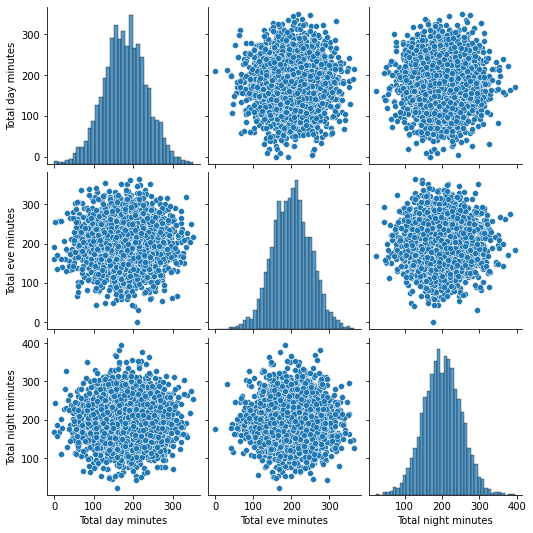

In [28]:
sns.pairplot(df2)

**Conclusion** : Since the correlation values between Total day minutes and Total eve minutes, Total day minutes and Total night minutes, Total eve minutes and Total night minutes is very low, there is no strong correlation between them and that is why the points are very scattered.

In [29]:
df2

,Total day minutes,Total eve minutes,Total night minutes
0,184.5,351.6,215.8
1,129.1,228.5,208.8
2,332.9,317.8,160.6
3,110.4,137.3,189.6
4,119.3,215.1,178.7
...,...,...,...
3328,134.7,189.7,221.4
3329,156.2,215.5,279.1
3330,231.1,153.4,191.3
3331,180.8,288.8,191.9


# Chi-Square Test

In [30]:
#Converting minutes into hours 

df2['Total day minutes'] = df2['Total day minutes'].div(60).round(2)
df2['Total eve minutes'] = df2['Total eve minutes'].div(60).round(2)
df2['Total night minutes'] = df2['Total night minutes'].div(60).round(2)

df2

,Total day minutes,Total eve minutes,Total night minutes
0,3.08,5.86,3.60
1,2.15,3.81,3.48
2,5.55,5.30,2.68
3,1.84,2.29,3.16
4,1.99,3.58,2.98
...,...,...,...
3328,2.24,3.16,3.69
3329,2.60,3.59,4.65
3330,3.85,2.56,3.19
3331,3.01,4.81,3.20


In [31]:
df2['Total Time'] = df2['Total day minutes'] + df2['Total eve minutes'] + df2['Total night minutes']
df2

,Total day minutes,Total eve minutes,Total night minutes,Total Time
0,3.08,5.86,3.60,12.54
1,2.15,3.81,3.48,9.44
2,5.55,5.30,2.68,13.53
3,1.84,2.29,3.16,7.29
4,1.99,3.58,2.98,8.55
...,...,...,...,...
3328,2.24,3.16,3.69,9.09
3329,2.60,3.59,4.65,10.84
3330,3.85,2.56,3.19,9.60
3331,3.01,4.81,3.20,11.02


In [32]:
#Inserting Churn Columnn from orignal dataset
df2.insert(1, value=df['Churn'], column='Churn') 

In [33]:
df2

,Total day minutes,Churn,Total eve minutes,Total night minutes,Total Time
0,3.08,False,5.86,3.60,12.54
1,2.15,True,3.81,3.48,9.44
2,5.55,True,5.30,2.68,13.53
3,1.84,False,2.29,3.16,7.29
4,1.99,False,3.58,2.98,8.55
...,...,...,...,...,...
3328,2.24,False,3.16,3.69,9.09
3329,2.60,False,3.59,4.65,10.84
3330,3.85,False,2.56,3.19,9.60
3331,3.01,False,4.81,3.20,11.02


In [34]:
cols = list(df2.columns.values)
cols

['Total day minutes',
 'Churn',
 'Total eve minutes',
 'Total night minutes',
 'Total Time']

In [35]:
#Rearranging columns

df2 = df2[['Churn', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total Time']]
df2

,Churn,Total day minutes,Total eve minutes,Total night minutes,Total Time
0,False,3.08,5.86,3.60,12.54
1,True,2.15,3.81,3.48,9.44
2,True,5.55,5.30,2.68,13.53
3,False,1.84,2.29,3.16,7.29
4,False,1.99,3.58,2.98,8.55
...,...,...,...,...,...
3328,False,2.24,3.16,3.69,9.09
3329,False,2.60,3.59,4.65,10.84
3330,False,3.85,2.56,3.19,9.60
3331,False,3.01,4.81,3.20,11.02


In [36]:
#Creating new dataframe by grouping Churn outcomes

df3 = df2.groupby('Churn').mean()
df3

,Total day minutes,Total eve minutes,Total night minutes,Total Time
Churn,,,,
False,2.919635,3.317456,3.335579,9.572670
True,3.448219,3.540124,3.420828,10.409172


In [37]:
df3


,Total day minutes,Total eve minutes,Total night minutes,Total Time
Churn,,,,
False,2.919635,3.317456,3.335579,9.572670
True,3.448219,3.540124,3.420828,10.409172


In [38]:
import pandas as pd
df3.to_csv

<bound method NDFrame.to_csv of        Total day minutes  Total eve minutes  Total night minutes  Total Time
Churn                                                                       
False           2.919635           3.317456             3.335579    9.572670
True            3.448219           3.540124             3.420828   10.409172>

In [39]:
df4 = pd.read_csv('ChiSquare.csv')
df4

,Churn,Total day minutes,Total eve minutes,Total night minutes,Total Time
0,FALSE,2.919635,3.317456,3.335579,9.572670
1,TRUE,3.448219,3.540124,3.420828,10.409172
2,Col_Total,6.367855,6.857580,6.756407,19.981842


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Churn                3 non-null      object 
 1   Total day minutes    3 non-null      float64
 2   Total eve minutes    3 non-null      float64
 3   Total night minutes  3 non-null      float64
 4   Total Time           3 non-null      float64
dtypes: float64(4), object(1)
memory usage: 248.0+ bytes


In [41]:
# label encoding
df4['Churn'] = df4['Churn'].map({'True': 1, 'False': 0})

In [42]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df4)


# interpret p-value
alpha = 0.05
print(float(p))
#print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')



nan
Independent (H0 holds true)


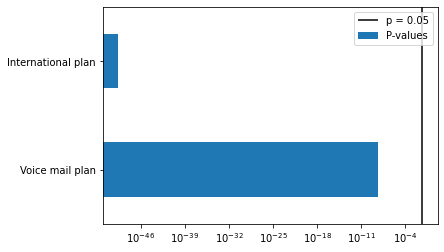

In [63]:
cat_cols = [ 'International plan', 'Voice mail plan']
num_cols = ['Total day minutes', 'Total eve minutes','Total night minutes']
# Perform Chi2-test for categorical columns against churn vs no-churn groups to check statistical significance
col_list = []
p_val_list = []

# Loop and calculate p-values for each feature
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['Churn'])
    
    # Compute the chi2-stat and p-value
    chi2_stat, p_val, dof,  exp_freq = chi2_contingency(observed=cross_tab)

    # Append p_values
    p_val_list.append(p_val)
    col_list.append(col)

import matplotlib.pyplot as plt

# Plot p-values
# P-value is the probability that the results from sample data occured by chance. Low p-values are good, they 
# indicate the data did not occur by chance. Most cases p-value of 0.05 is accepted to mean data is valid
pvals = pd.DataFrame(p_val_list, col_list)
pvals.columns = ['P-values']
pvals.sort_values(by='P-values', ascending=False).plot(kind='barh');
plt.semilogx()
plt.vlines(x=0.05, ymin=-1, ymax=len(num_cols), colors='k', label='p = 0.05');
plt.legend();

**Analysis summary**

From the plot above International plan, Voice mail plan are all statistically significant with p-values < 0.05

**Conclusion** : There is no significant relation beteeen Total day minutes, Total eve minutes & Total night minutes